In [34]:
library(ggplot2)
library(dplyr)
library(broom)
library(ggpubr)

In [35]:
income.data = read.csv("income.data.csv")
heart.data = read.csv("heart.data.csv")

In [36]:
head(income.data)

,X,income,happiness
,<int>,<dbl>,<dbl>
1,1,3.862647,2.314489
2,2,4.979381,3.433490
3,3,4.923957,4.599373
4,4,3.214372,2.791114
5,5,7.196409,5.596398
6,6,3.729643,2.458556


In [37]:
head(heart.data)

,X,biking,smoking,heart.disease
,<int>,<dbl>,<dbl>,<dbl>
1,1,30.801246,10.896608,11.769423
2,2,65.129215,2.219563,2.854081
3,3,1.959665,17.588331,17.177803
4,4,44.800196,2.802559,6.816647
5,5,69.428454,15.974505,4.062224
6,6,54.403626,29.333176,9.550046


In [38]:
summary(income.data)

       X             income        happiness    
 Min.   :  1.0   Min.   :1.506   Min.   :0.266  
 1st Qu.:125.2   1st Qu.:3.006   1st Qu.:2.266  
 Median :249.5   Median :4.424   Median :3.473  
 Mean   :249.5   Mean   :4.467   Mean   :3.393  
 3rd Qu.:373.8   3rd Qu.:5.992   3rd Qu.:4.503  
 Max.   :498.0   Max.   :7.482   Max.   :6.863  

In [39]:
summary(heart.data)

       X             biking          smoking        heart.disease    
 Min.   :  1.0   Min.   : 1.119   Min.   : 0.5259   Min.   : 0.5519  
 1st Qu.:125.2   1st Qu.:20.205   1st Qu.: 8.2798   1st Qu.: 6.5137  
 Median :249.5   Median :35.824   Median :15.8146   Median :10.3853  
 Mean   :249.5   Mean   :37.788   Mean   :15.4350   Mean   :10.1745  
 3rd Qu.:373.8   3rd Qu.:57.853   3rd Qu.:22.5689   3rd Qu.:13.7240  
 Max.   :498.0   Max.   :74.907   Max.   :29.9467   Max.   :20.4535  

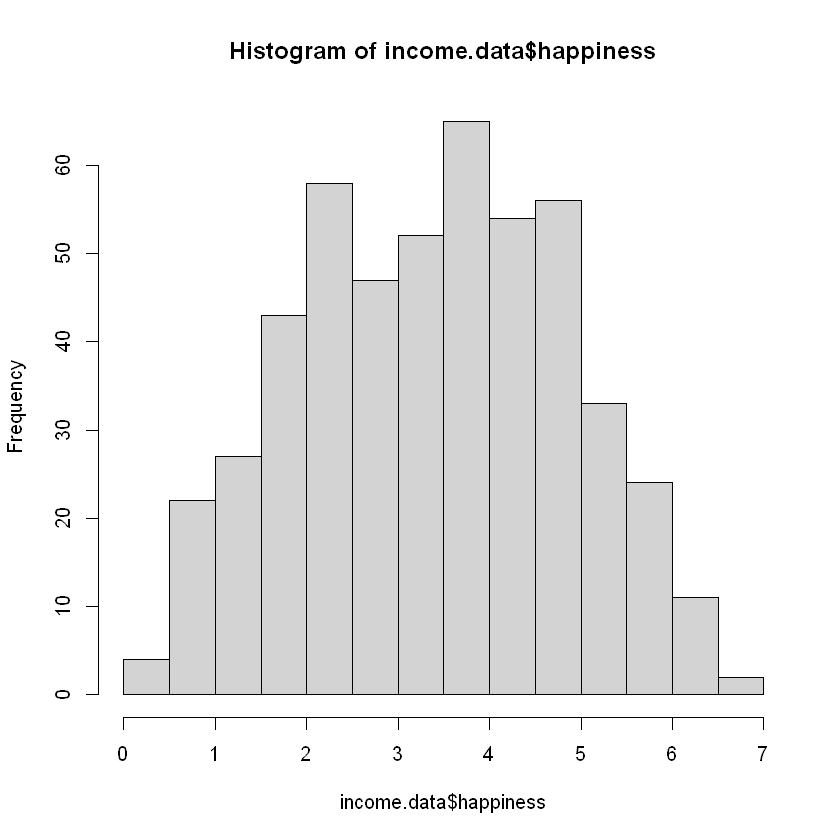

In [40]:
hist(income.data$happiness)

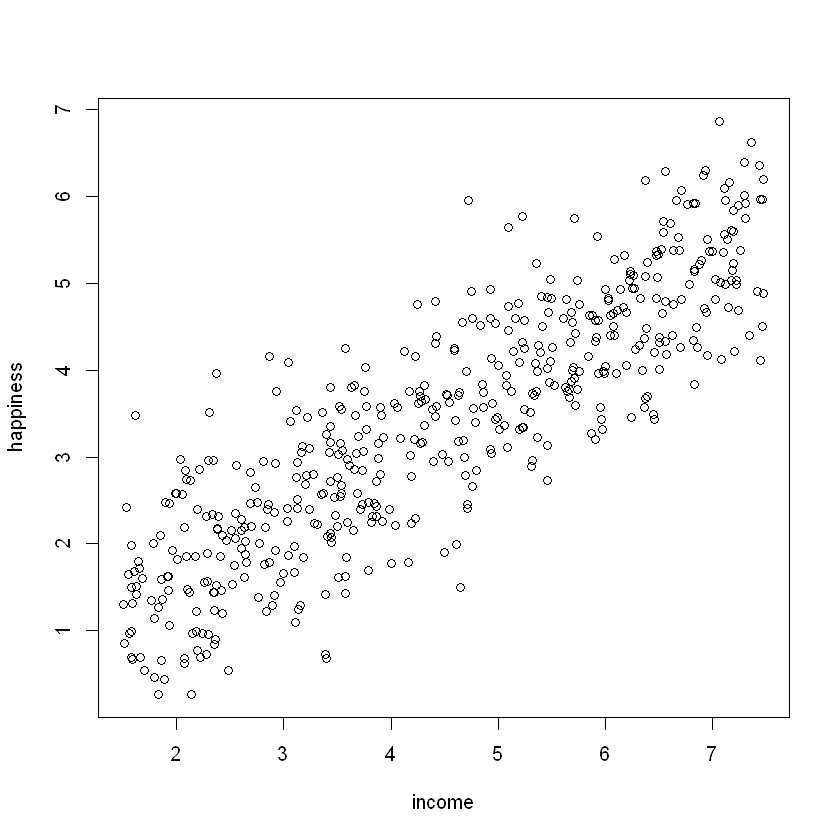

In [41]:
plot(happiness~income,data=income.data)

In [42]:
cor(heart.data$biking, heart.data$smoking)

[1] 0.01513618

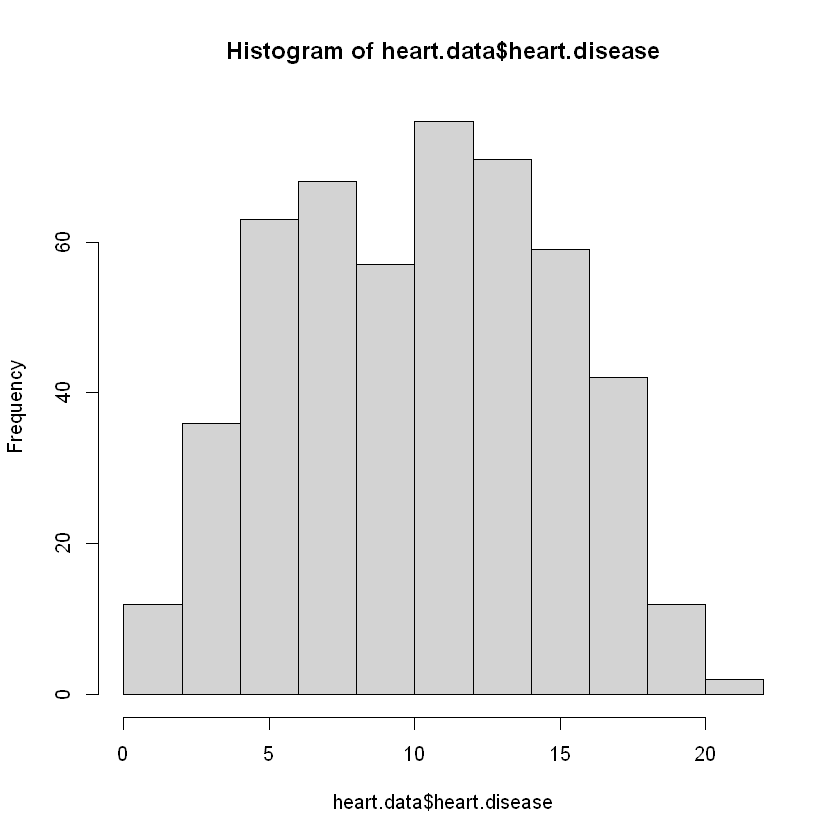

In [43]:
hist(heart.data$heart.disease)

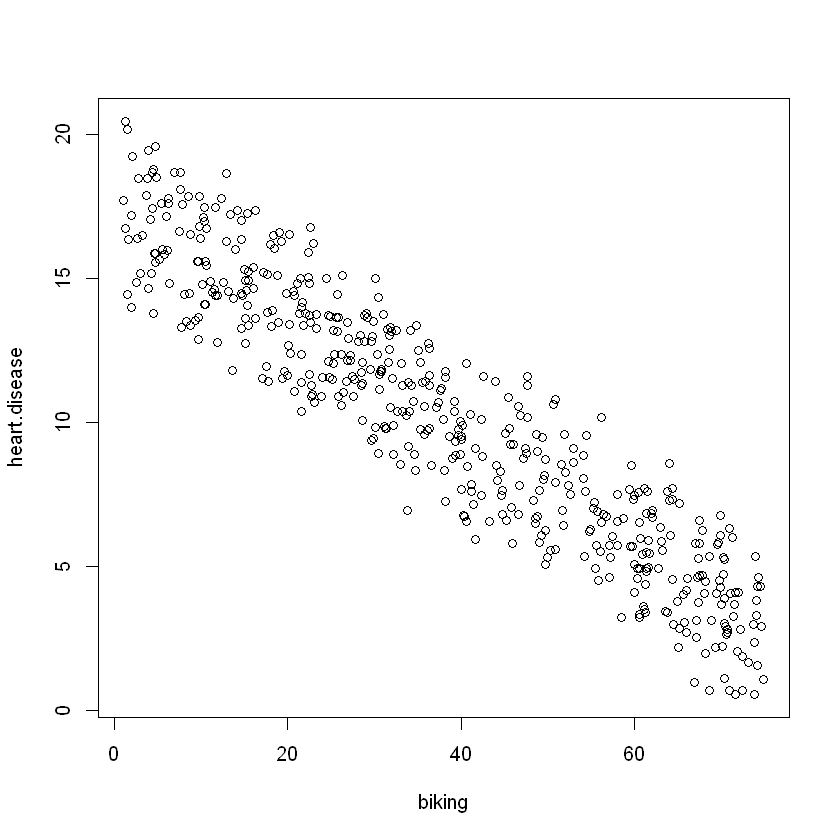

In [44]:
plot(heart.disease ~ biking, data=heart.data)

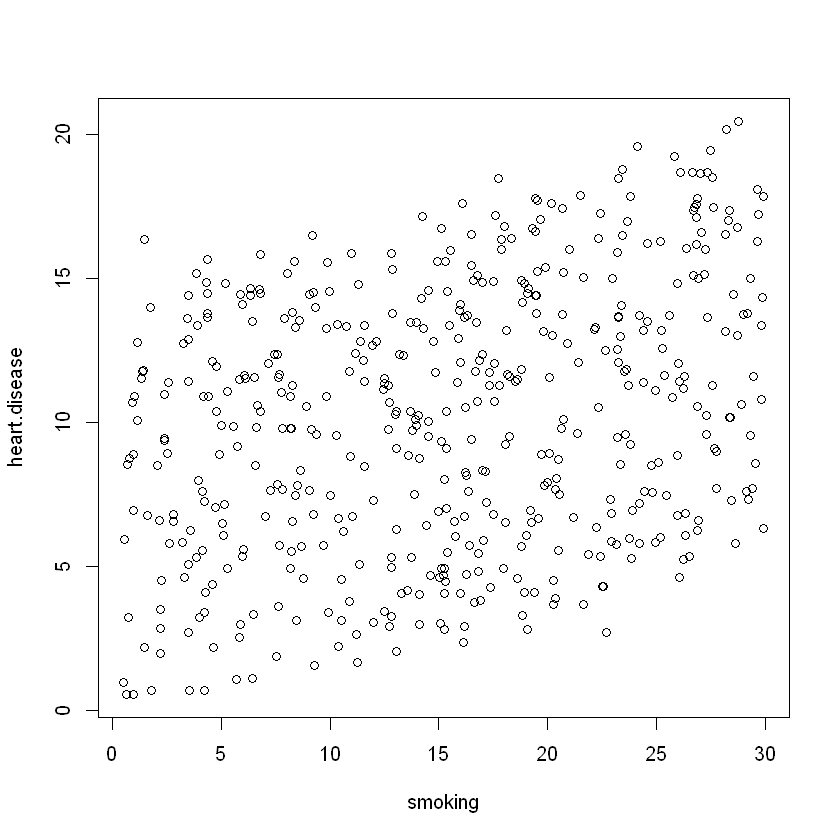

In [45]:
plot(heart.disease ~ smoking, data=heart.data)

In [46]:
income.happiness.lm <- lm(happiness ~ income, data = income.data)

summary(income.happiness.lm)


Call:
lm(formula = happiness ~ income, data = income.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02479 -0.48526  0.04078  0.45898  2.37805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20427    0.08884   2.299   0.0219 *  
income       0.71383    0.01854  38.505   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7181 on 496 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7488 
F-statistic:  1483 on 1 and 496 DF,  p-value: < 2.2e-16


In [47]:
heart.disease.lm<-lm(heart.disease ~ biking + smoking, data = heart.data)

summary(heart.disease.lm)


Call:
lm(formula = heart.disease ~ biking + smoking, data = heart.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1789 -0.4463  0.0362  0.4422  1.9331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.984658   0.080137  186.99   <2e-16 ***
biking      -0.200133   0.001366 -146.53   <2e-16 ***
smoking      0.178334   0.003539   50.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.654 on 495 degrees of freedom
Multiple R-squared:  0.9796,	Adjusted R-squared:  0.9795 
F-statistic: 1.19e+04 on 2 and 495 DF,  p-value: < 2.2e-16


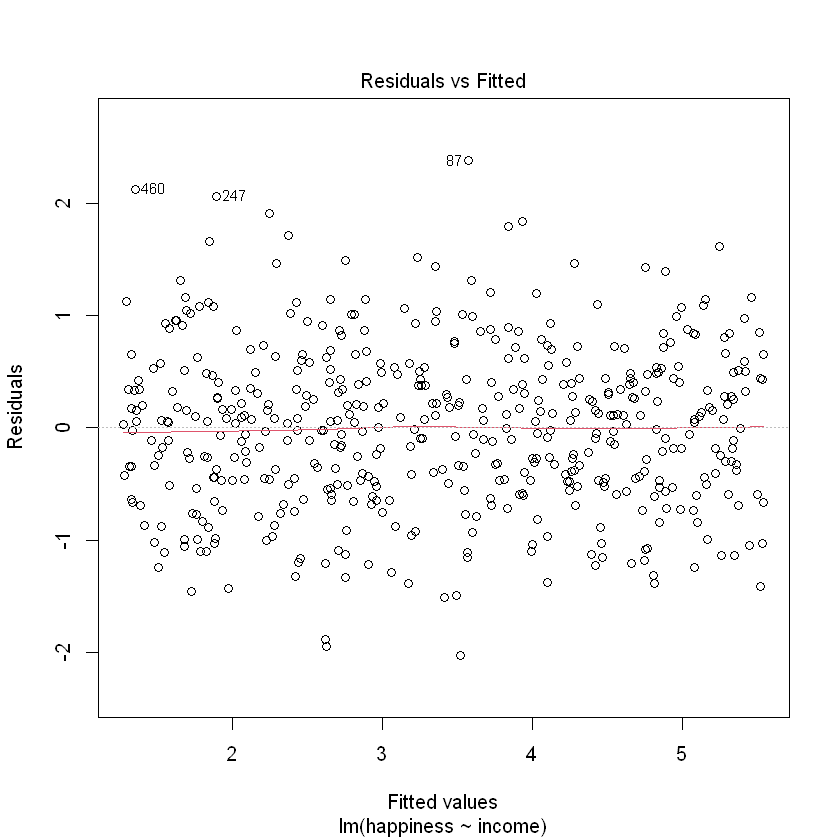

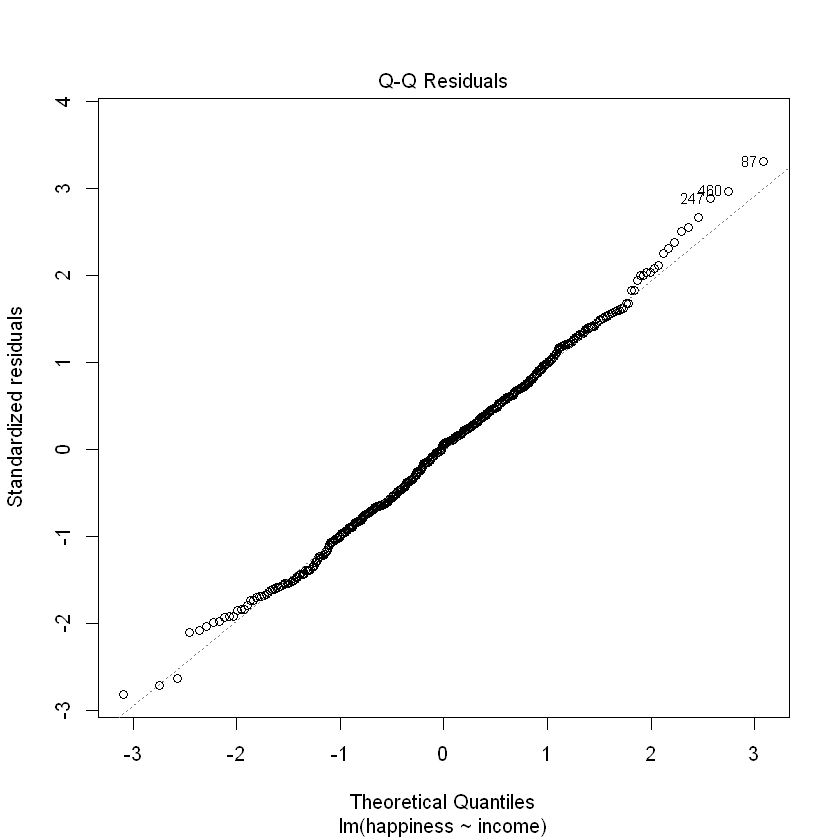

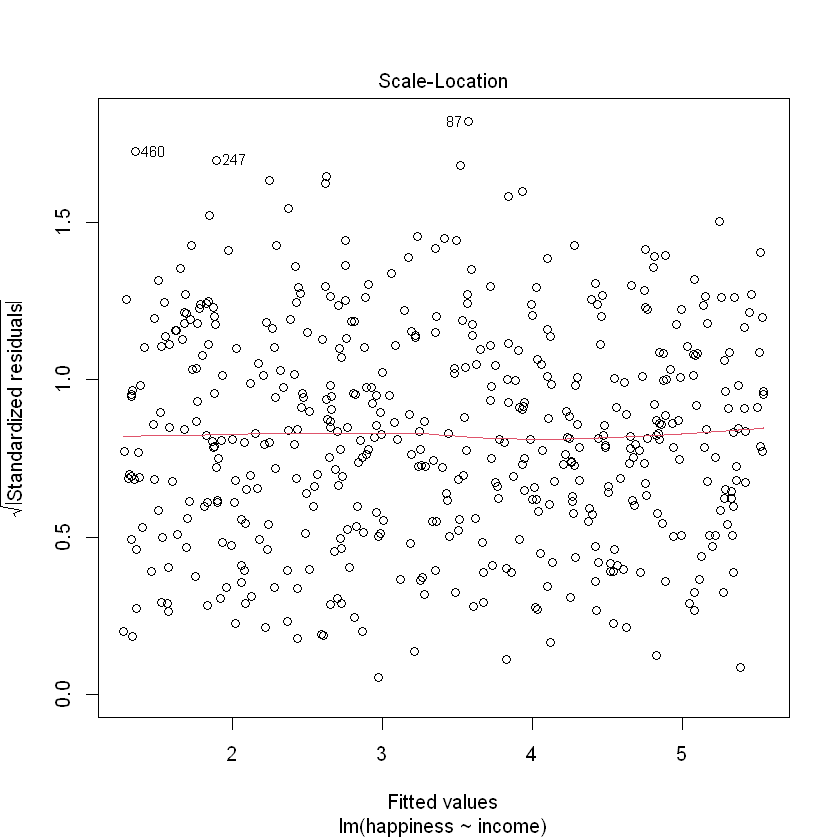

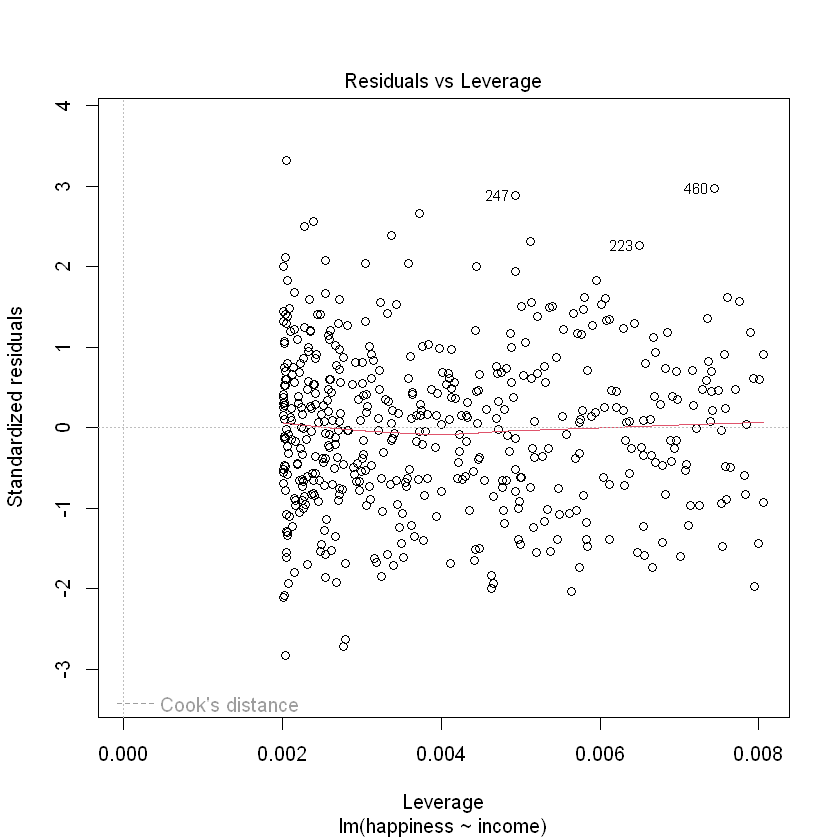

In [48]:
plot(income.happiness.lm)

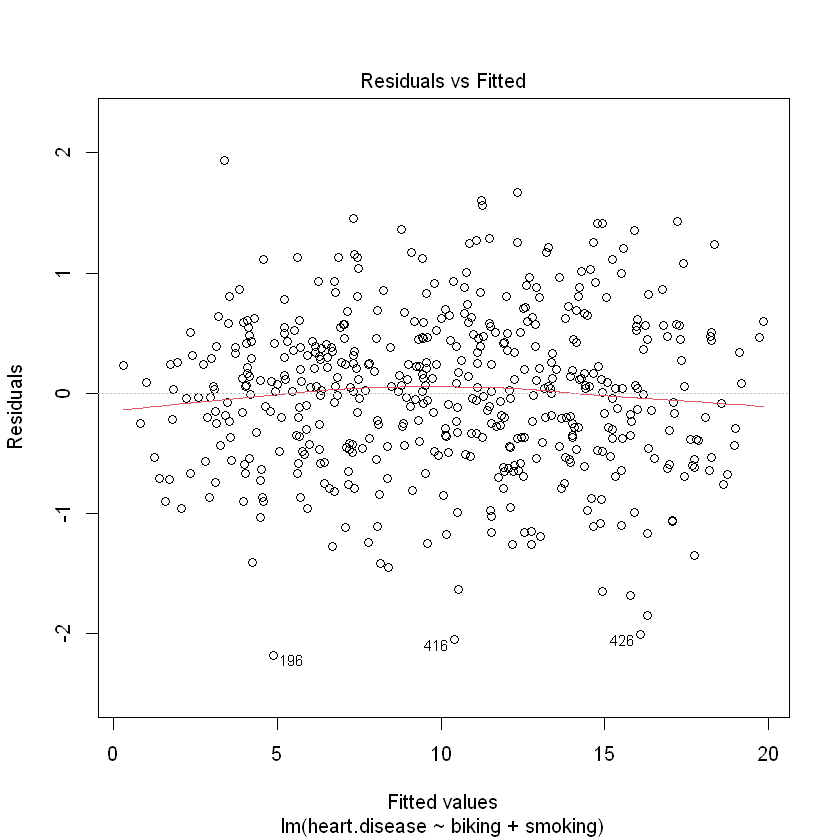

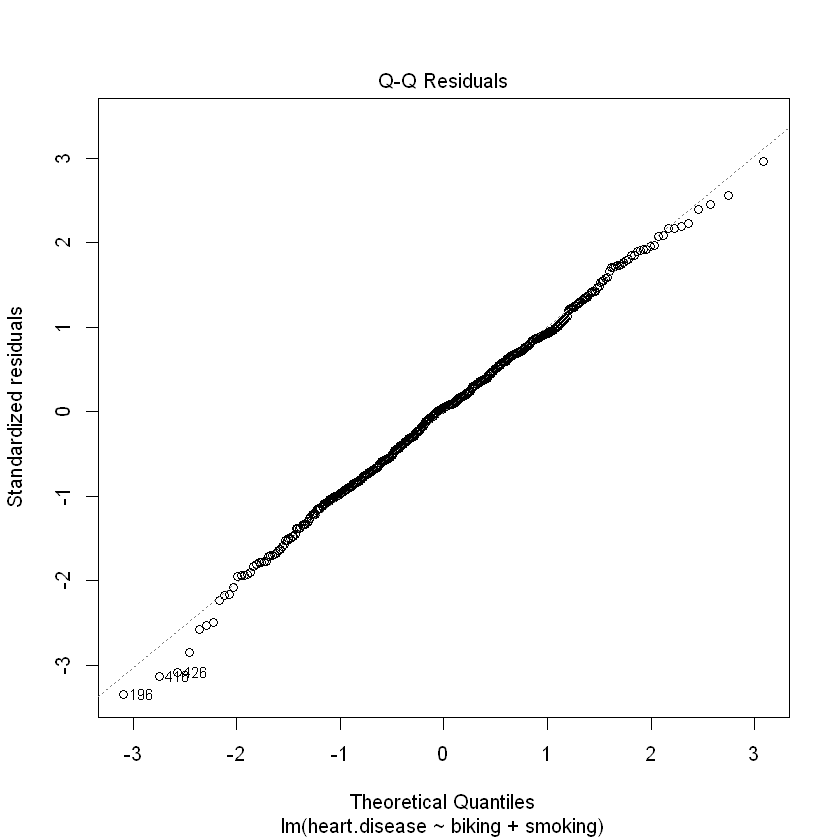

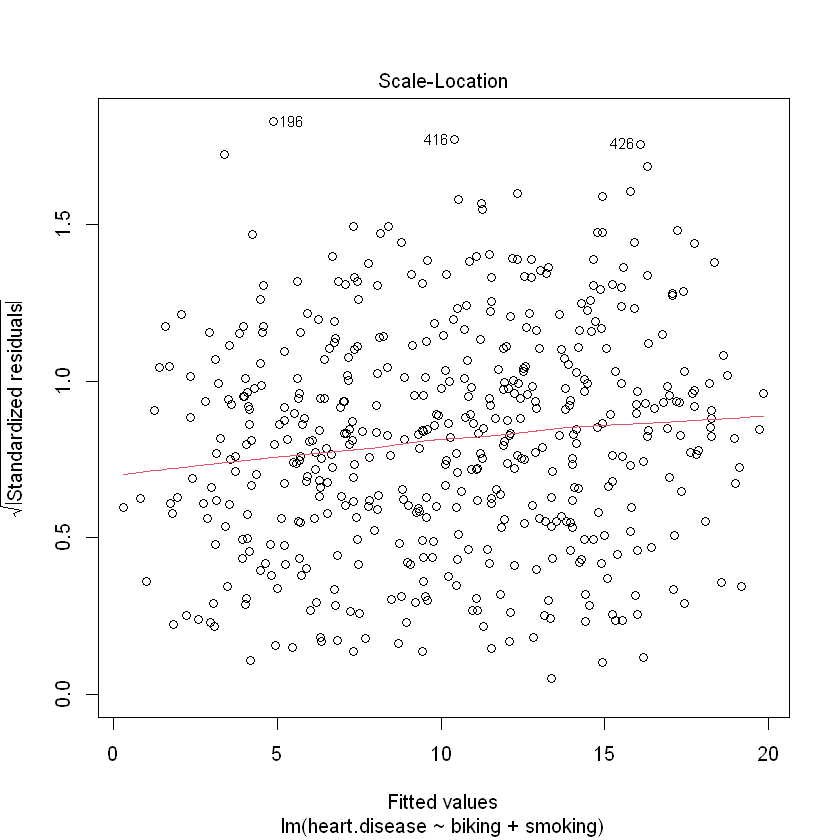

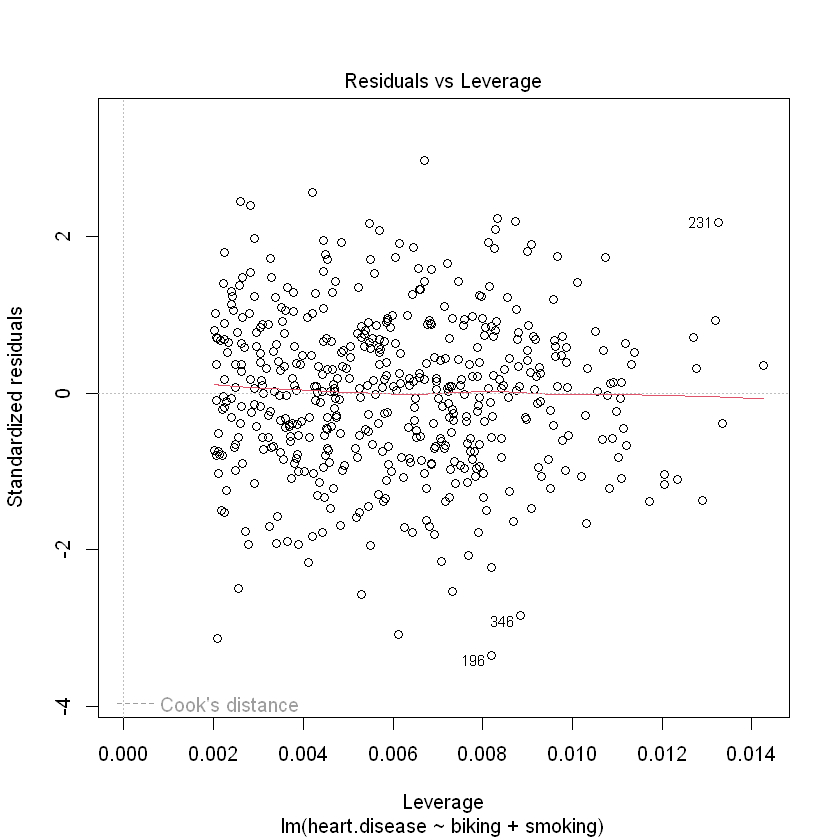

In [49]:
plot(heart.disease.lm)

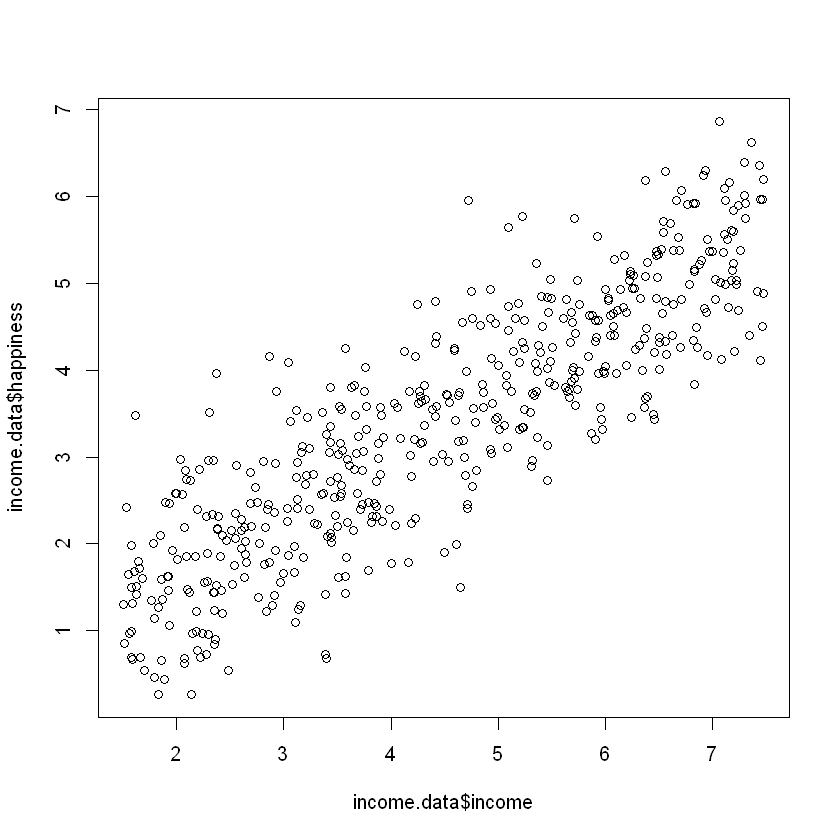

In [55]:
plot(income.data$income,income.data$happiness)

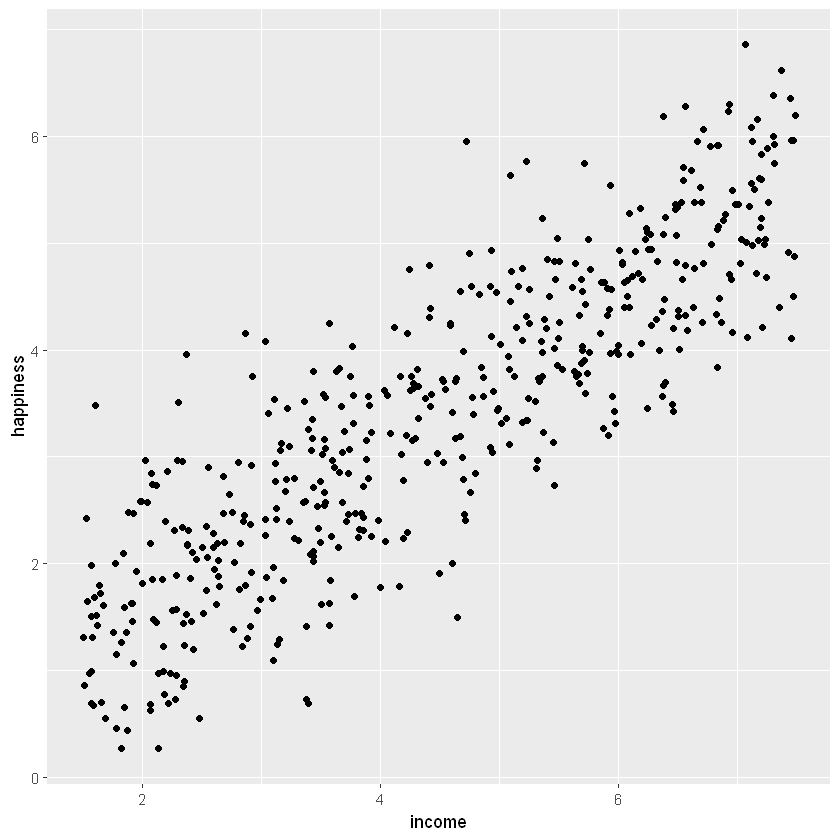

In [50]:
income.graph<-ggplot(income.data, aes(x=income, y=happiness)) + geom_point()
income.graph

`geom_smooth()` using formula = 'y ~ x'


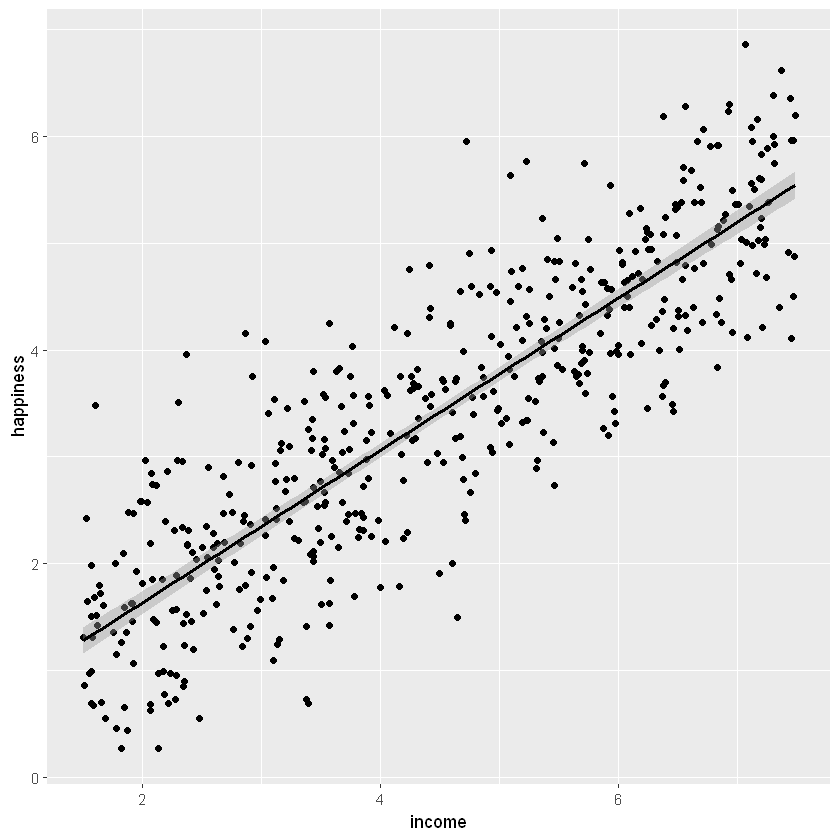

In [51]:
income.graph = income.graph + geom_smooth(method="lm",col="black")
income.graph

`geom_smooth()` using formula = 'y ~ x'


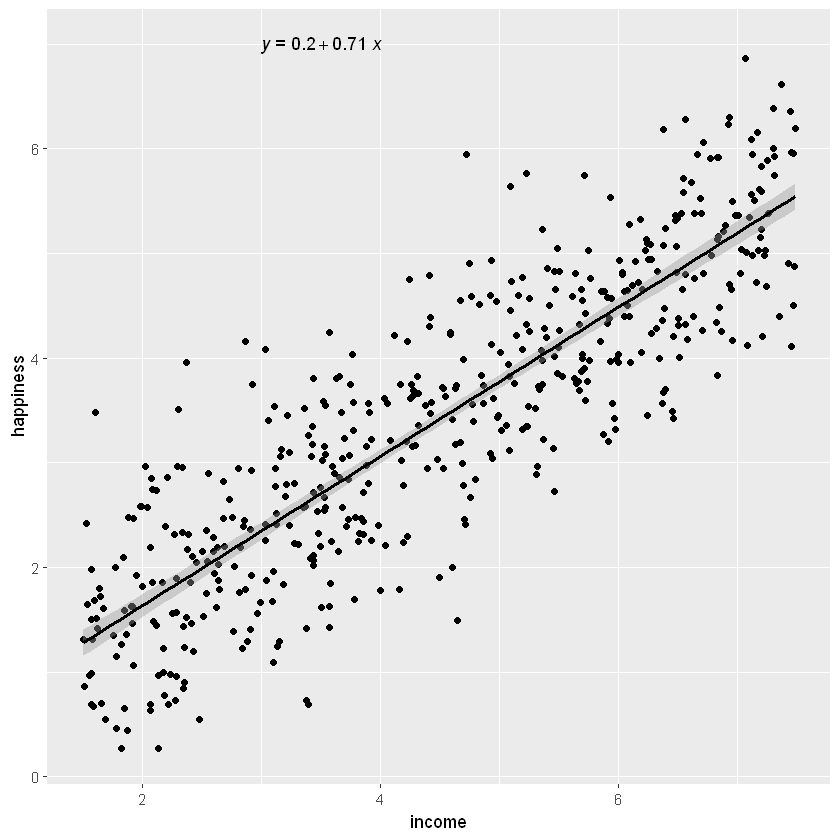

In [52]:
income.graph <- income.graph + stat_regline_equation(label.x = 3, label.y = 7)
income.graph

`geom_smooth()` using formula = 'y ~ x'


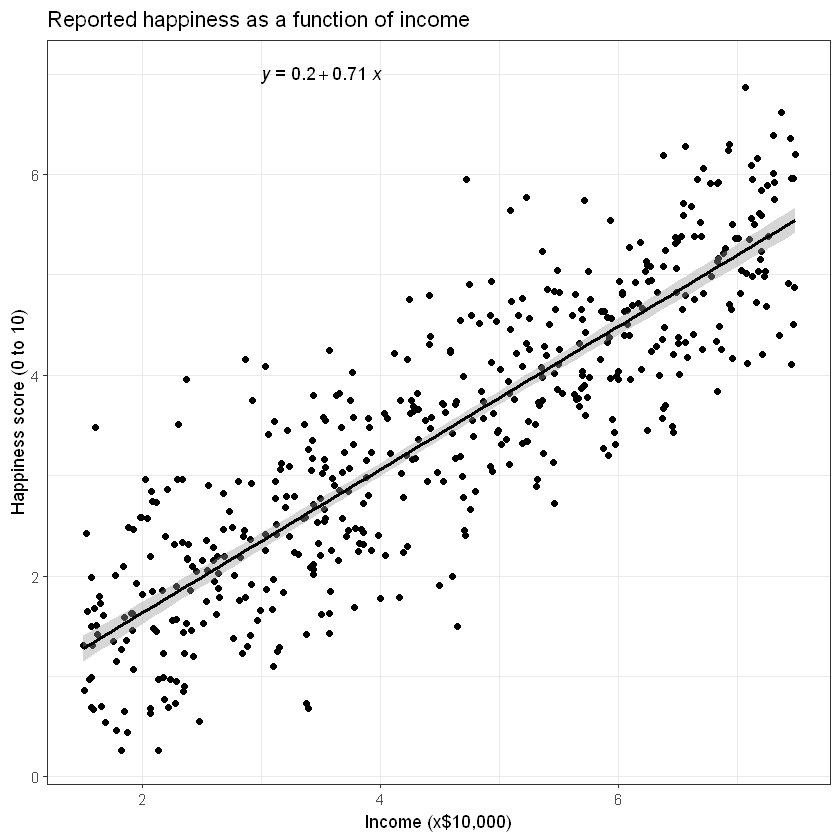

In [53]:
income.graph +  theme_bw() + labs(title = "Reported happiness as a function of income", x = "Income (x$10,000)", y = "Happiness score (0 to 10)")